# Regression

## Simple Linear Regression

*predict the percentage of marks that a student is expected to score based upon the number of hours they studied.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataset = pd.read_csv('./Resources/student_scores.csv')
print(dataset.head(5))
print('\nShape : {}'.format(dataset.shape))
dataset.describe()

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Shape : (25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


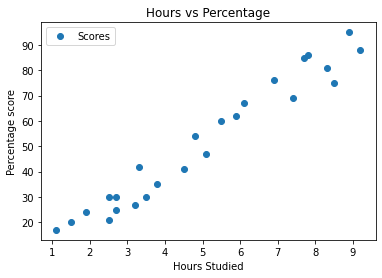

In [9]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

From the given graph we can see the positive linear relation between the number of hours studied and the percentage score

The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column

In [14]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Training

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Intercept : {}'.format(regressor.intercept_))
print('Coefficient: {}'.format(regressor.coef_))

Intercept : 2.018160041434683
Coefficient: [9.91065648]


Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

### Prediction

In [24]:
y_pred = regressor.predict(X_test)

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

In [25]:
comparison_df = pd.DataFrame({'Actual ': y_test, 'Predicted ':y_pred})
comparison_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluation

1. Mean Absolute Square(MAE) is the mean of absolute value of errors :

$\frac{1}{n}{\sum\limits_{i=1}^n}\lvert Actual - Predicted \rvert$

2. Mean Squared Error(MSE) is the mean of squared error :

$\frac{1}{n}{\sum\limits_{i=1}^n}{\lvert Actual - Predicted \rvert}^2$

3. Root Mean Squared Error(RMSE) is the square root of the mean squared error

$\sqrt{\frac{1}{n}{\sum\limits_{i=1}^n}{\lvert Actual - Predicted \rvert}^2}$



In [26]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

---

## Multiple Linear Regression

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('./Resources/petrol_consumption.csv')

print(dataset.head(5))
print('\nShape : {}'.format(dataset.shape))
dataset.describe()

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Shape : (48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [30]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training

the regression model has to find the most optimal coefficients for all the attributes

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

### Prediction

In [33]:
y_pred = regressor.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


### Evaluation

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


You can see that the value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

- Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
- Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.
